## Nguyễn Thái Nguyên - 2274802010587

### Pandas

In [17]:
import pandas as pd 
import numpy as np

data = {
    "ID": [101, 102, 103, 104, 105],
    "Name": ["Thái Nguyên", "Minh Nhật", None, "Nguyên Hoàng", "Lan Ngọc"],
    "Age": [21,22,20,25,None],
    "Salary": [50000, 10000, 30000, 15000, None],
}

df = pd.DataFrame(data)
df

,ID,Name,Age,Salary
0,101,Thái Nguyên,21.0,50000.0
1,102,Minh Nhật,22.0,10000.0
2,103,None,20.0,30000.0
3,104,Nguyên Hoàng,25.0,15000.0
4,105,Lan Ngọc,NaN,NaN


In [21]:
# điền giá trị thiếu trong cột age = giá trị trung bình
df['Age'].fillna(df['Age'].mean(), inplace=True)

# loại bỏ các dòng chứa giá trị thiếu
df.dropna(inplace=True)

# Điền giá trị thiếu trong name bằng "Unknown"
df['Name'].fillna('Unknown', inplace=True)

# Điền giá trị thiếu trong salary bằng phương pháp Interpolation
df['Salary'] = df['Salary'].interpolate()
#cách khác
df["Salary"].interpolate(methode = "linear", inplace = True)
df

,ID,Name,Age,Salary
0,101,Thái Nguyên,21.0,50000.0
1,102,Minh Nhật,22.0,10000.0
2,103,Unknown,20.0,30000.0
3,104,Nguyên Hoàng,25.0,15000.0
4,105,Lan Ngọc,22.0,15000.0


In [35]:
# Cho data
df1 = pd.DataFrame({
    "ID": [1, 2, 3],
    "ScoreA": [70, 80, 95],
})

df2 = pd.DataFrame({
    "ID": [3, 4, 5],
    "ScoreB": [43, 81, 90],
})
df1
df2

,ID,ScoreB
0,3,43
1,4,81
2,5,90


In [45]:
# Thực hiện Merge trên cột ID (Inner join, left join, outer join)
# ---Inner join---
inner_merge = pd.merge(df1, df2, on="ID", how="inner")
print("Inner Join:\n", inner_merge)
# ---Left join---
left_merge = pd.merge(df1, df2, on="ID", how="left")
print("Left Join:\n", left_merge)
# ---Outer join---
outer_merge = pd.merge(df1, df2, on="ID", how="outer")
print("Outer Join:\n", outer_merge)

# Nối DataFrame theo chiều dọc
noi_Data = pd.concat([df1, df2], ignore_index=True)
print("Dữ liệu được nối:\n", noi_Data)

# Gộp df1 và df2 để điền giá trị thiếu
gop_df1_df2 = df1.set_index('ID').combine_first(df2.set_index('ID')).reset_index()
print("Gộp:\n", gop_df1_df2)




Inner Join:
    ID  ScoreA  ScoreB
0   3      95      43
Left Join:
    ID  ScoreA  ScoreB
0   1      70     NaN
1   2      80     NaN
2   3      95    43.0
Outer Join:
    ID  ScoreA  ScoreB
0   1    70.0     NaN
1   2    80.0     NaN
2   3    95.0    43.0
3   4     NaN    81.0
4   5     NaN    90.0
Vertical Concat:
    ID  ScoreA  ScoreB
0   1    70.0     NaN
1   2    80.0     NaN
2   3    95.0     NaN
3   3     NaN    43.0
4   4     NaN    81.0
5   5     NaN    90.0
Gộp:
    ID  ScoreA  ScoreB
0   1    70.0     NaN
1   2    80.0     NaN
2   3    95.0    43.0
3   4     NaN    81.0
4   5     NaN    90.0


In [57]:
# Cho data
import pandas as pd
import numpy as np

data1 = pd.DataFrame({
    "ID": range(1,1000001),
    "Value": np.random.randint(1, 100, 1000000)
})
data1

,ID,Value
0,1,16
1,2,22
2,3,85
3,4,98
4,5,94
...,...,...
999995,999996,64
999996,999997,9
999997,999998,83
999998,999999,89


In [71]:
# Dùng .astype để tối ưu hóa bộ nhớ
# Tối ưu kiểu dữ liệu
data1["ID"] = data1["ID"].astype("int32")
data1["Value"] = data1["Value"].astype("int8")

print(data1.info())

# Tìm 5 giá trị phổ biến trong cột Value
data1["Value"].value_counts().head(5)

# Sử dụng query để lọc dữ liệu nhanh hơn df[df["Value"] > 90]
data1.query("Value > 90")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   ID      1000000 non-null  int32
 1   Value   1000000 non-null  int8 
dtypes: int32(1), int8(1)
memory usage: 4.8 MB
None


,ID,Value
3,4,98
4,5,94
24,25,94
43,44,97
77,78,97
...,...,...
999959,999960,95
999969,999970,99
999987,999988,96
999989,999990,94


### Matplotlib

Biểu đồ nhiều đường

In [73]:
# Cho dữ liệu sau
import matplotlib.pyplot as plt
import numpy as np 

t = np.linspace(0, 10, 100)
y1 = np.sin(t)
y2 = np.cos(t)
y3 = np.sin(t) * np.cos(t)

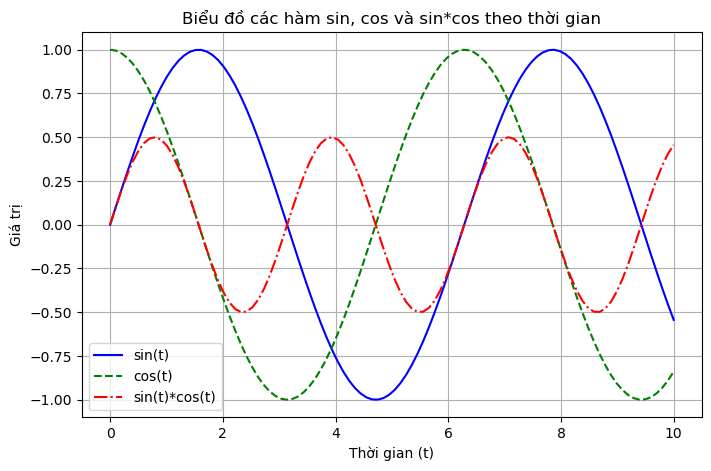

In [77]:
# Tạo biểu đồ các đường theo thời gian
plt.figure(figsize=(8, 5))
plt.plot(t, y1, label='sin(t)', linestyle='-', color='blue')
plt.plot(t, y2, label='cos(t)', linestyle='--', color='green')
plt.plot(t, y3, label='sin(t)*cos(t)', linestyle='-.', color='red')

plt.title('Biểu đồ các hàm sin, cos và sin*cos theo thời gian')
plt.xlabel('Thời gian (t)')
plt.ylabel('Giá trị')
plt.legend()
plt.grid(True)
plt.show()

Biểu đồ thanh nhóm

In [87]:
# Cho data
ticks = ["Q1", "Q2", "Q3", "Q4"]
A = [500, 700, 800, 600]
B = [450, 350, 650, 750]
C = [500, 250, 850, 600]

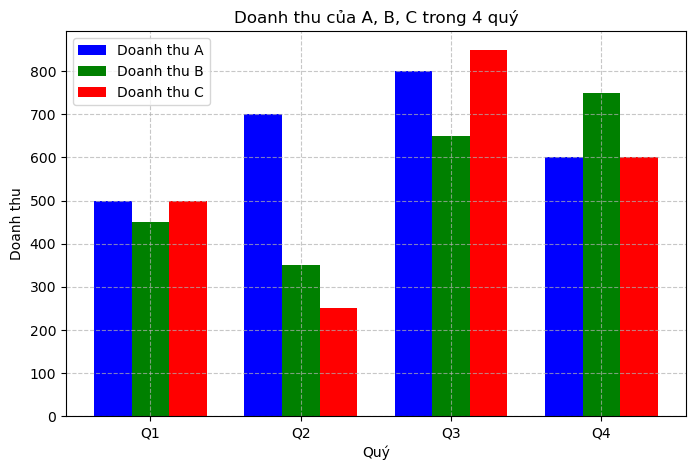

In [89]:
# Vẽ biểu đồ thanh nhóm thể hiển doanh thu của A, B, C trong 4 quý
x = np.arange(len(ticks))
width = 0.25
# Vẽ biểu đồ thanh nhóm
plt.figure(figsize=(8, 5))
plt.bar(x - width, A, width, label='Doanh thu A', color='blue')
plt.bar(x, B, width, label='Doanh thu B', color='green')
plt.bar(x + width, C, width, label='Doanh thu C', color='red')

# Cấu hình biểu đồ
plt.xticks(x, ticks)
plt.xlabel('Quý')
plt.ylabel('Doanh thu')
plt.title('Doanh thu của A, B, C trong 4 quý')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Biểu đồ tròn 

In [96]:
Cty = ['A', 'B', 'C', 'D']
thiPhan = [30, 25, 25, 20]
mauSac = ["#ff9999", "#66b3ff", "#99f999", "#ffcc99"]

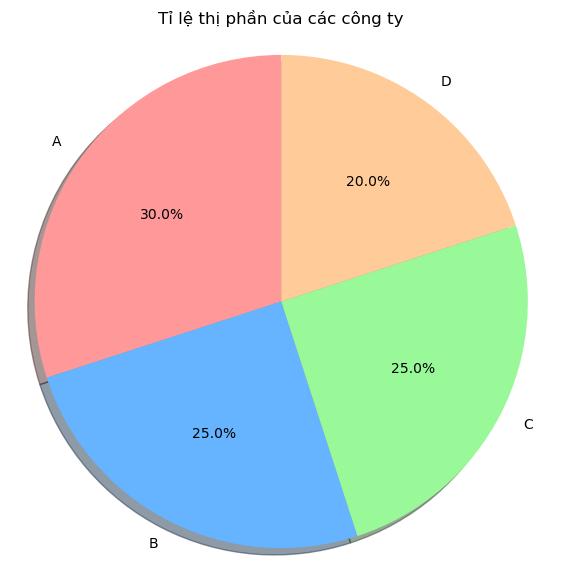

In [93]:
# Tạo biểu đồ tròn biểu hiện tỉ lệ thị phần của công ty
plt.figure(figsize=(7, 7))
plt.pie(thiPhan, labels=Cty, colors=mauSac, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Tỉ lệ thị phần của các công ty')
plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.show()

Biểu đồ phân tán

In [99]:
X = np.random.rand(100)
Y = np.random.rand(100)
sizes = np.random.rand(100)*300
colors = np.random.rand(100)

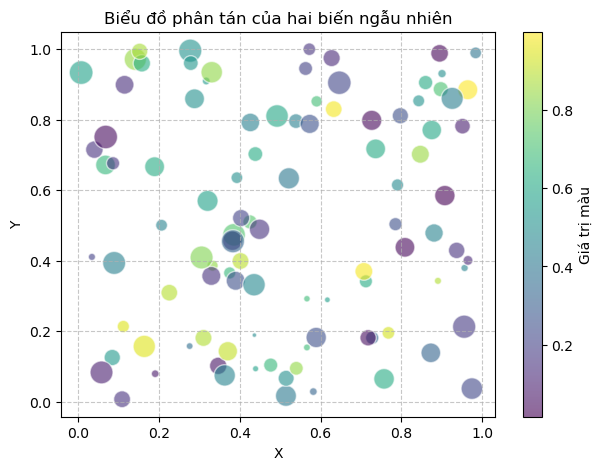

In [116]:
# Tạo biểu đồ phân tán của hai biến ngẫu nhiên
plt.figure(figsize=(7, 5))
plt.scatter(X, Y, s=sizes, c=colors, alpha=0.6, cmap='viridis', edgecolors='w')
plt.title('Biểu đồ phân tán của hai biến ngẫu nhiên')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Giá trị màu')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Biểu đồ nhiệt

In [110]:
import seaborn as sns
dataa = np.random.rand(10,10)

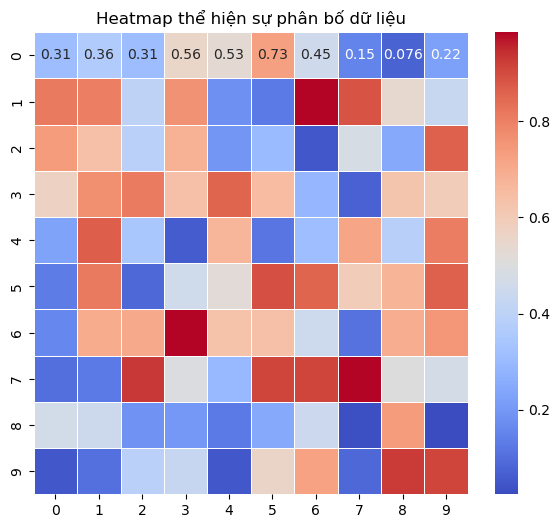

In [114]:
# Vẽ một heatmap thể hiện sự phân bố của dữ liệu trên ma trận
plt.figure(figsize=(7, 6))
sns.heatmap(dataa, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Heatmap thể hiện sự phân bố dữ liệu')
plt.show()
